<a href="https://colab.research.google.com/github/DonovanBilanoski/DonovanBilanoski/blob/main/Mid_Term_Rough_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raw Dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Processed Dataset:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


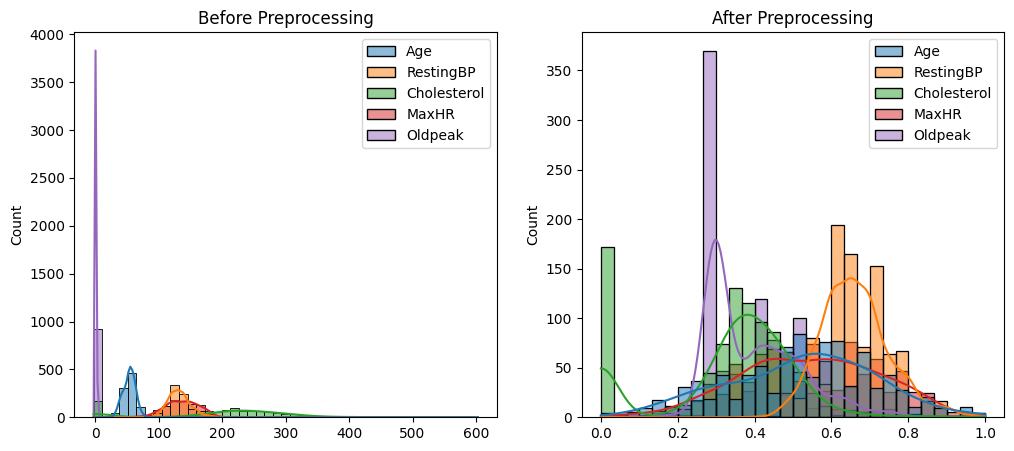

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Machine Learning Mid-Term.xlsx"
xls = pd.ExcelFile(file_path)
df_raw = pd.read_excel(xls, sheet_name='heart (1)')

# Display raw dataset
print("Raw Dataset:")
display(df_raw.head())

# Copy for processing
df = df_raw.copy()

# Encoding categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_transformed = encoder.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_transformed, columns=encoder.get_feature_names_out(categorical_cols))

# Scaling numerical features
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Concatenating transformed categorical data with the original dataframe
df = df.drop(columns=categorical_cols)
df = pd.concat([df, categorical_df], axis=1)

# Normalization
normalizer = MinMaxScaler()
df[numerical_cols] = normalizer.fit_transform(df[numerical_cols])

# Display processed dataset
print("Processed Dataset:")
display(df.head())

# Visualizing the transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_raw[numerical_cols], kde=True, ax=axes[0])
axes[0].set_title("Before Preprocessing")
sns.histplot(df[numerical_cols], kde=True, ax=axes[1])
axes[1].set_title("After Preprocessing")
plt.show()

# Save cleaned dataset
df.to_csv("cleaned_heart_disease_data.csv", index=False)